Heart Disease - Exploratory Data Analysis




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Config
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/heart.csv')

# First look at the data
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (1025, 14)

First few rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
# Check target variable distribution
print("Target variable distribution:")
print(df['target'].value_counts())
print(f"\nPercentage with heart disease: {df['target'].mean()*100:.1f}%")


Target variable distribution:
target
1    526
0    499
Name: count, dtype: int64

Percentage with heart disease: 51.3%


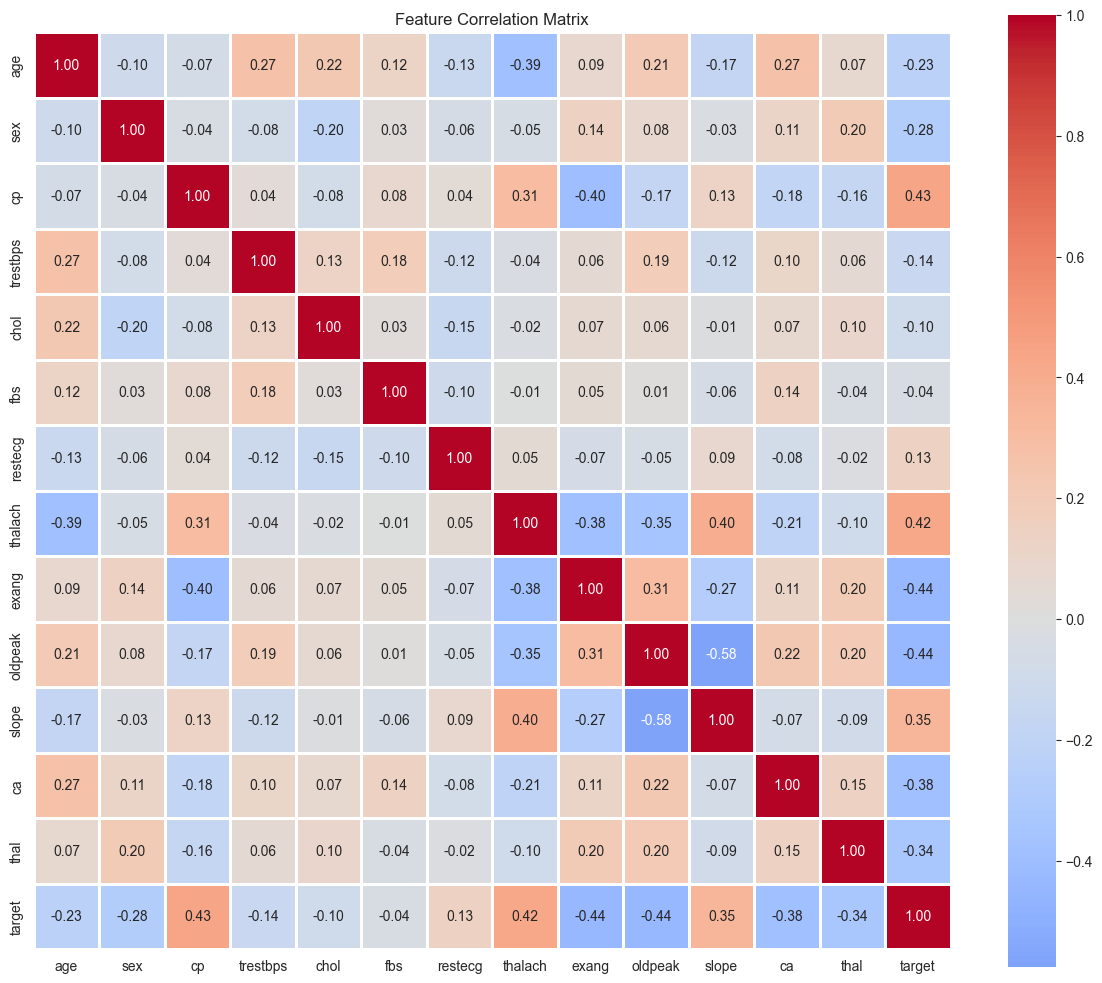


Features most correlated with heart disease:
target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


In [5]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Features most correlated with target
print("\nFeatures most correlated with heart disease:")
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print(target_corr)

## Key Findings

**Strongest predictors:**
- cp (chest pain type): 0.43
- thalach (max heart rate): 0.42  
- slope: 0.35

**Negative correlations:**
- oldpeak (ST depression): -0.43
- exang (exercise angina): -0.44
- ca (number of vessels): -0.39

cp and thalach show some correlation (0.39), might be worth monitoring for multicollinearity in linear models.